In [1]:
import torch
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import csv

In [2]:
# Dataset config
LEN_ENCODE_SERIE = 100
LEN_DECODE_SERIE = 3
section_len = 100

DATA_TYPE = "sin"

In [3]:
# Makeup data tensor
num_data = 40000

data_tensor = torch.empty(num_data)


if DATA_TYPE == "polynomial":
    data_tensor[0] = 1
    for i in range(1, num_data):
        data_tensor[i] = data_tensor[i-1] * 1.0001
elif DATA_TYPE == "linear":
    for i in range(num_data):
        data_tensor[i] = 3 + i
elif DATA_TYPE == "sin":
    for i in range(num_data):
#         rand1 = random.randint(-1,1)
#         rand2 = random.randint(-1,1)
        x = (i + 5999) * 5
        rand1 = 1
        rand2 = random.randint(3,5)
        rand3 = math.log(random.randint(1, 10))
        data_tensor[i] = math.sin(rand2 + x) + x / 10 + rand3 / 3
else:
    raise(NotImplementedError)

print(data_tensor)
print(data_tensor.shape)


tensor([ 2999.5681,  3000.9761,  3001.8643,  ..., 22998.2754, 22998.6113,
        22999.5898])
torch.Size([40000])


Max 22999.58984375
Min 2999.568115234375
Mean 12999.7548828125
Standard deviation 5773.5732421875


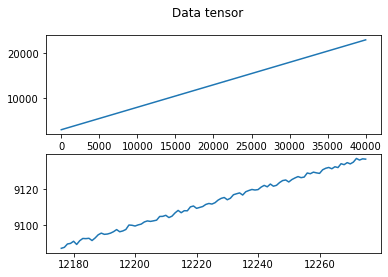

In [4]:
plt_time = list(range(len(data_tensor)))

section_start = random.randint(0, num_data - section_len)

fig, axs = plt.subplots(2)
fig.suptitle('Data tensor')
axs[0].plot(plt_time, data_tensor)
axs[1].plot(plt_time[section_start:section_start+section_len], data_tensor[section_start:section_start+section_len])

mini = torch.min(data_tensor)
maxi = torch.max(data_tensor)
mean = torch.mean(data_tensor)
std = torch.std(data_tensor)

print("Max", maxi.item())
print("Min", mini.item())
print("Mean", mean.item())
print("Standard deviation", std.item())

In [5]:
change = data_tensor[:-1]

Max 2.5697546005249023
Min 0.543118417263031
Mean 1.0573350191116333
Standard deviation 0.13427329063415527


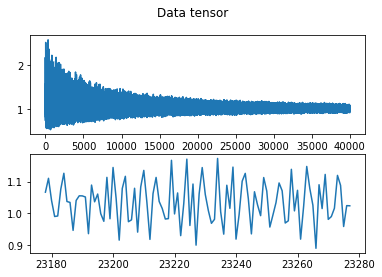

In [6]:
# Convert price to change in price
change = (data_tensor[1:] - data_tensor[:-1]) / data_tensor[:-1]
change *= 10000

change = 1.1 ** change

section_start = random.randint(0, num_data - section_len)
fig, axs = plt.subplots(2)
fig.suptitle('Data tensor')
axs[0].plot(plt_time[:-1], change)
axs[1].plot(plt_time[section_start:section_start+section_len], change[section_start:section_start+section_len])

mini = torch.min(change)
maxi = torch.max(change)
mean = torch.mean(change)
std = torch.std(change)

print("Max", maxi.item())
print("Min", mini.item())
print("Mean", mean.item())
print("Standard deviation", std.item())

In [7]:
# Checking for nan data
assert(torch.sum(change != change) == 0)

Max 11.263741493225098
Min -3.8296267986297607
Mean 8.438321401627036e-07
Standard deviation 1.0


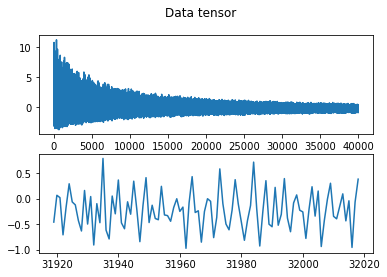

In [8]:
# Normalize
change = (change - mean) / std

section_start = random.randint(0, num_data - section_len)
fig, axs = plt.subplots(2)
fig.suptitle('Data tensor')
axs[0].plot(plt_time[:-1], change)
axs[1].plot(plt_time[section_start:section_start+section_len], change[section_start:section_start+section_len])

mini = torch.min(change)
maxi = torch.max(change)
mean = torch.mean(change)
std = torch.std(change)

print("Max", maxi.item())
print("Min", mini.item())
print("Mean", mean.item())
print("Standard deviation", std.item())

In [9]:
# Make input time serie data and target time serie data tensor 
num_data = (len(data_tensor) - LEN_ENCODE_SERIE - LEN_DECODE_SERIE) // LEN_DECODE_SERIE

X_shape = (num_data, LEN_ENCODE_SERIE)
y_shape = (num_data, LEN_DECODE_SERIE)

X, y = torch.empty(X_shape), torch.empty(y_shape)

for i in range(num_data):
    start = i * LEN_DECODE_SERIE
    X[i] = change[start:start+LEN_ENCODE_SERIE]
    y[i] = change[start+LEN_ENCODE_SERIE:start+LEN_ENCODE_SERIE+LEN_DECODE_SERIE]

In [10]:
# Analog y that turns > 1 std to 1
print(y)
y = torch.ones_like(y) * (y > 0).float() + torch.zeros_like(y) * (y <= 0).float()
print(y)

tensor([[-2.9284e-01,  2.4111e-01,  6.0506e+00],
        [ 6.8871e-01, -2.6819e+00,  1.1386e+00],
        [ 5.1101e+00,  4.0969e+00,  5.1830e-01],
        ...,
        [-5.0596e-02, -1.6922e-03, -3.2250e-02],
        [-6.2801e-01, -5.4661e-01, -4.0224e-01],
        [ 3.9171e-02,  1.8851e-01, -6.2447e-01]])
tensor([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 0.]])


In [11]:
print(X.shape)
print(y.shape)
print(X)
print(y)

torch.Size([13299, 100])
torch.Size([13299, 3])
tensor([[ 3.7749e+00,  2.0001e+00, -2.3069e+00,  ...,  1.2437e+00,
          6.0754e+00, -1.9558e+00],
        [ 7.1042e-01, -6.8736e-01,  8.3084e+00,  ..., -2.9284e-01,
          2.4111e-01,  6.0506e+00],
        [-1.8424e+00,  1.7613e-01, -4.4199e-01,  ...,  6.8871e-01,
         -2.6819e+00,  1.1386e+00],
        ...,
        [-5.5519e-01, -1.4193e-01, -7.0854e-01,  ...,  5.5271e-02,
         -2.1916e-01, -9.8444e-01],
        [-2.8809e-02,  1.1375e-01, -3.9613e-01,  ..., -5.0596e-02,
         -1.6922e-03, -3.2250e-02],
        [-8.1926e-01, -1.0361e-02,  1.3902e-01,  ..., -6.2801e-01,
         -5.4661e-01, -4.0224e-01]])
tensor([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 0.]])


In [12]:
torch.save(X, "./../X.pt")
torch.save(y, "./../y.pt")